In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from funpymodeling.exploratory import freq_tbl

In [2]:
# Carga desde un archivo .xlsx sin indice
Amsterdam  = pd.read_csv('Amsterdam.csv')
Amsterdam = Amsterdam.drop(columns = ["Unnamed: 0.1", "Unnamed: 0"])

In [3]:
# Verificamos información del dataframe
Amsterdam.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9659 entries, 0 to 9658
Data columns (total 50 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   last_scraped                                  9659 non-null   object 
 1   name                                          9659 non-null   object 
 2   host_name                                     9659 non-null   object 
 3   host_since                                    9659 non-null   object 
 4   host_response_time                            9659 non-null   object 
 5   host_response_rate                            9659 non-null   object 
 6   host_acceptance_rate                          9659 non-null   object 
 7   host_is_superhost                             9659 non-null   object 
 8   host_identity_verified                        9659 non-null   object 
 9   neighbourhood                                 9659 non-null   o

DETERMINACIÓN DE CLASES PARA DATOS AGRUPADOS 

In [4]:
#Calculamos el numero total de la población "n"

Amsterdam['review_scores_communication'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 9659 entries, 0 to 9658
Series name: review_scores_communication
Non-Null Count  Dtype  
--------------  -----  
9659 non-null   float64
dtypes: float64(1)
memory usage: 75.6 KB


In [5]:
# Obtenemos el limite superior y el límite inferios de la columna objetivo
Max = Amsterdam['review_scores_communication'].max()
Min = Amsterdam['review_scores_communication'].min()
Limites = [Min, Max]
Limites

[4.76, 5.0]

In [6]:
# Calculamos el rango R
R = Max - Min
R

0.2400000000000002

In [7]:
# Calculamos el número de intervalos de clase "ni", aplicando la regla de Sturges
n = 9659

ni = 1 + 3.32 * np.log10(n)
ni

14.229974791343807

In [8]:
# Calculamos el ancho del intervalo "i"
i = R / ni
i

0.016865806406487376

CREACIÓN DE CATEGORÍAS A PARTIR DE CLASES

In [10]:
# Categorización de variables
intervalos = np.linspace (4.76, 5, 15)
intervalos

array([4.76      , 4.77714286, 4.79428571, 4.81142857, 4.82857143,
       4.84571429, 4.86285714, 4.88      , 4.89714286, 4.91428571,
       4.93142857, 4.94857143, 4.96571429, 4.98285714, 5.        ])

In [11]:
# Creamos las categorías
categorias = [ "Categoria1", "Categoria2", "Categoria3", "Categoria4", "Categoria5", "Categoria6", "Categoria7", "Categoria8", "Categoria9", "Categoria10", "Categoria11", "Categoria12", "Categoria13", "Categoria14" ]

In [12]:
# Creamos las ctegorias en la columna numerica
Amsterdam['review_scores_communication'] = pd.cut ( x = Amsterdam ['review_scores_communication'], bins = intervalos, labels = categorias )
Amsterdam['review_scores_communication']

0        Categoria6
1        Categoria9
2        Categoria5
3       Categoria14
4        Categoria2
           ...     
9654     Categoria9
9655     Categoria9
9656    Categoria14
9657     Categoria9
9658     Categoria9
Name: review_scores_communication, Length: 9659, dtype: category
Categories (14, object): ['Categoria1' < 'Categoria2' < 'Categoria3' < 'Categoria4' ... 'Categoria11' < 'Categoria12' < 'Categoria13' < 'Categoria14']

In [13]:
table1 = freq_tbl(Amsterdam['review_scores_communication'])
table1

,review_scores_communication,frequency,percentage,cumulative_perc
0,Categoria14,5582,0.577907,0.580129
1,Categoria9,1343,0.139041,0.719705
2,Categoria13,438,0.045346,0.765226
3,Categoria12,434,0.044932,0.810330
4,Categoria10,433,0.044829,0.855332
5,Categoria7,246,0.025468,0.880898
6,Categoria11,246,0.025468,0.906464
7,Categoria6,207,0.021431,0.927978
8,Categoria5,177,0.018325,0.946373
9,Categoria3,165,0.017083,0.963521


In [14]:
# Elimino las columnas "porcentage" y "cumulative_perc" para trabajar con las frecuencias

table2 = table1.drop(['percentage', 'cumulative_perc'], axis=1)
table2

,review_scores_communication,frequency
0,Categoria14,5582
1,Categoria9,1343
2,Categoria13,438
3,Categoria12,434
4,Categoria10,433
5,Categoria7,246
6,Categoria11,246
7,Categoria6,207
8,Categoria5,177
9,Categoria3,165


In [15]:
# Ajusto el indice de mi data frame

Filtro_index = table2.set_index('review_scores_communication')
Filtro_index

,frequency
review_scores_communication,
Categoria14,5582
Categoria9,1343
Categoria13,438
Categoria12,434
Categoria10,433
Categoria7,246
Categoria11,246
Categoria6,207
Categoria5,177


Text(0, 0.5, 'Frecuencia')

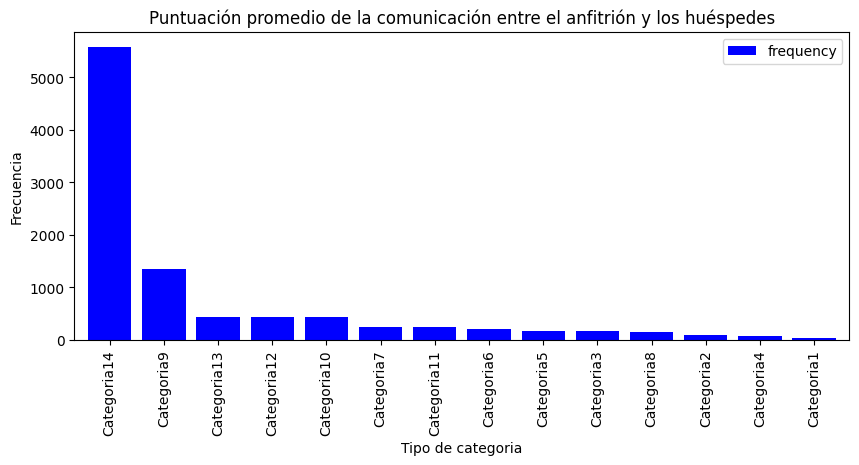

In [16]:
# Realizamos gráfico de barras del dataframe filtrado

Filtro_index.plot( kind = 'bar', width = 0.8, figsize = (10,4), color = "blue" )
plt.title('Puntuación promedio de la comunicación entre el anfitrión y los huéspedes')
plt.xlabel('Tipo de categoria')
plt.ylabel('Frecuencia')